# Exo6 Rossler by Numa Gout 

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 :

**Flot de Rossler**

Le flot de Rossler est régie par les équations suivants : 

$$\left\{\begin{matrix}
\dot{x} = -y-z\\ 
\dot{y} = x+ay\\ 
\dot{z} = b+(x-c)z
\end{matrix}\right.$$

avec a, b, c choisis arbitrairement. (ici on choisira $a=b=0.2$ et $c=5.7$

Les positions d'équilibres sont donc pour $\dot{x} = \dot{y} = \dot{z} = 0$, après résolution on trouve pour $a \neq 0$ :

$$\left\{\begin{matrix}
x_1 = \frac{c + \sqrt{c^2 - 4ab}}{2}\\ 
y_1 = \frac{-c-\sqrt{c^2 - 4ab}}{2a}\\ 
z_1 = \frac{c+\sqrt{c^2 - 4ab}}{2a}
\end{matrix}\right. \text{   et   } \left\{\begin{matrix}
x_2 = \frac{c - \sqrt{c^2 - 4ab}}{2}\\ 
y_2 = \frac{-c+\sqrt{c^2 - 4ab}}{2a}\\ 
z_2 = \frac{c-\sqrt{c^2 - 4ab}}{2a}
\end{matrix}\right.$$

**Stabilité des positions d'équilibre**

On a l'équation $\frac{\mathrm{d}\overrightarrow{x}}{\mathrm{d} t} = \overrightarrow{f}(\overrightarrow{x})$.

D'après le cours, en posant $u = x - x_e$ et en faisant un développement linéaire en 0 on obtient l'équation : 

$$\frac{\mathrm{d}\overrightarrow{u}}{\mathrm{d} t} = Au$$, avec $A$ la jacobienne de $\overrightarrow{f}$ au point d'équilibre.

On a donc : $A = \begin{pmatrix}
0 & -1 & -1\\ 
1 & a & 0\\ 
z & 0 & x-c
\end{pmatrix}$ avec $det(A) = x+za-c$ et $tr(A) = x-c+a$

Pour le point d'équilibre $\overrightarrow{x_1}$ on a : $det(A) = 5.68$ et $tr(A) = 0.192$

et pour $\overrightarrow{x_2}$ on a : $det(A) = -5.68$ et $tr(A) = -5.492$

On sait donc que $\overrightarrow{x_2}$ est instable

Pour $\overrightarrow{x_1}$ on ne peut rien conclure avec le déterminant et la trace; on décide donc de trouver les valeurs propres numériquement, et on trouve : $\lambda_1 = -0.0014 + 5.4i$, $\lambda_2 = -0.0014 -5.4i$ et $\lambda_3 = 0.19$.

Deux des valeurs propres ont leur partie réelle négative donc $\overrightarrow{x_1}$ est aussi une position d'équilibre instable.

## Question 2 :

In [2]:
def resolution(a, b, c, x0, y0, z0, N, t):
    '''Renvoie le T, les points X, les point Y, les points Z et leurs dérivées respectives correspondantes pour le flot de Rossler de paramètre a, b et c et de point de départ x0, y0 et z0'''
    T = np.linspace(0, (N+1)*t, N+1) # Initialisation du Temps
    X = [x0] # Initialisation des points X
    Y = [y0] # Initialisation des points Y
    Z = [z0] # Initialisation des points Z
    Xpoint = []
    Ypoint = []
    Zpoint = []
    for n in range(N):
        # calcul les derivees aux points
        xprime = -Y[-1]-Z[-1]
        yprime = X[-1]+a*Y[-1]
        zprime = b+(X[-1]-c)*Z[-1]
        X.append(t*xprime + X[-1])
        Y.append(t*yprime + Y[-1])
        Z.append(t*zprime + Z[-1])
        Xpoint.append(xprime)
        Ypoint.append(yprime)
        Zpoint.append(zprime)
    Xpoint.append(-Y[-1]-Z[-1])
    Ypoint.append(X[-1]+a*Y[-1])
    Zpoint.append(b + (X[-1]-c)*Z[-1])
    return T, X, Y, Z, Xpoint, Ypoint, Zpoint

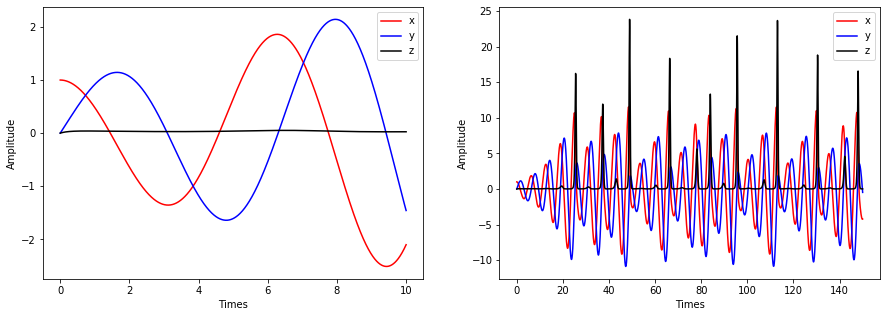

In [3]:
# On plot l'evolution de x, y, z en fonction de t
fig = plt.figure(figsize = (15,5))

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 10000, 0.001)
ax = fig.add_subplot(1, 2, 1, xlabel = 'Times', ylabel = 'Amplitude')
ax.plot(T, X, color = 'red', label = 'x')
ax.plot(T, Y, color = 'blue', label = 'y')
ax.plot(T, Z, color = 'black', label = 'z')
ax.legend()

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
ax = fig.add_subplot(1, 2, 2, xlabel = 'Times', ylabel = 'Amplitude')
ax.plot(T, X, color = 'red', label = 'x')
ax.plot(T, Y, color = 'blue', label = 'y')
ax.plot(T, Z, color = 'black', label = 'z')
ax.legend()

On peut donc conjecturer que $x$, $y$, $z$ ne divergent pas. De plus on peut distinguer une période.

## Question 3 :

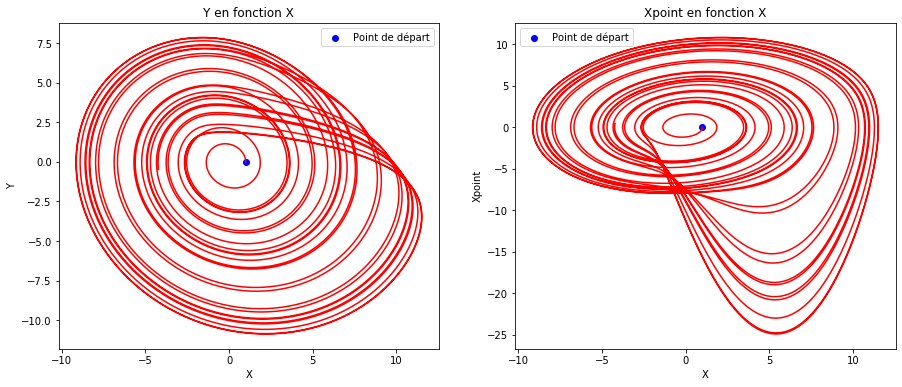

In [4]:
# On plot l'evolution de y en fonction de x et la derivee de x en fonction x
fig = plt.figure(figsize = (15,6))

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
ax = fig.add_subplot(1, 2, 1, xlabel = 'X', ylabel = 'Y')
ax.scatter(X[0], Y[0], color = 'blue', label = 'Point de départ')
ax.set_title('Y en fonction X')
ax.plot(X, Y, color = 'red')
ax.legend()

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
ax = fig.add_subplot(1, 2, 2, xlabel = 'X', ylabel = 'Xpoint')
ax.scatter(X[0], Xpoint[0], color = 'blue', label = 'Point de départ')
ax.set_title('Xpoint en fonction X')
ax.plot(X, Xpoint, color = 'red')
ax.legend()

## Question 4 :

Je comprends pas très bien cette question, je vais essayer de faire ce que j'ai compris et montrer que $x$ et $y$ sont en quadrature de phase

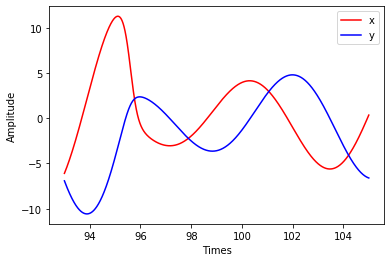

In [5]:
# On regarde à l'oeil si une quadrature de phase est pas absurde
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
plt.plot(T[31000:35000], X[31000:35000], color = 'red', label = 'x')
plt.plot(T[31000:35000], Y[31000:35000], color = 'blue', label = 'y')
plt.xlabel('Times')
plt.ylabel('Amplitude')
plt.legend()

In [6]:
# On calcule la periode, le decalage temporel et le rapport
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
indicemaxminX = []
indicemaxminY = []
for i in range(31000, 35001):
    if Xpoint[i]*Xpoint[i+1]<=0: # Condition d'extremum sur X (passage de positif a negatif)
        indicemaxminX.append(i)
    if Ypoint[i]*Ypoint[i+1]<=0: # Condition d'extremum sur Y (passage de positif a negatif)
        indicemaxminY.append(i)
periode = np.abs(T[indicemaxminX[0]] - T[indicemaxminX[2]]) #*2 car sinon on a l'intervalle de temps entre 2 extremums et pas 2 maximum
deltaT = np.abs(T[indicemaxminY[0]] - T[indicemaxminX[0]])
print('Période = '+str(round(periode, 2)))
print('Déphasage = '+str(round(deltaT, 2)))
print('Rapport = '+str(round(deltaT/periode, 2)))

Période = 5.2
Déphasage = 1.22
Rapport = 0.23


On a calculé la période, le décalage temporel et le rapport entre le deux, on voit donc que $x$ et $y$ sont en quadrature de phase

## Question 5

Nous allons former la section de Pointcaré $y+z=0$. C'est une section très intéressante, car d'après la définition de l'attracteur de Rossler, tout point sur ce plan vérifient la condition $\dot{x} = 0$. On sait donc que chaque point de la section correspond à un extremum de $x$

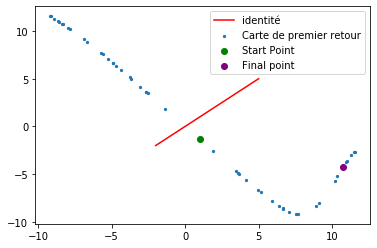

In [9]:
# On va tracer la carte de premier retour de la section de pointcare y+z=0
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
YZ = [Y[i]+Z[i] for i in range(len(Y))]
indicepointcare = []
for i in range(len(YZ)-1):
    if YZ[i]*YZ[i+1]<=0: # Condition d'annulation de Z+Y (passage positif a negatif)
        indicepointcare.append(i)
Xn = []
Xn1 = []
for i in range(len(indicepointcare)-1): # On extrait les valeurs des extremums
    Xn.append(X[indicepointcare[i]])
    Xn1.append(X[indicepointcare[i+1]])
plt.scatter(Xn, Xn1, s = 5, label = 'Carte de premier retour')
plt.plot([-2, 5], [-2, 5], color = 'red', label = "identité")
plt.scatter(Xn[0], Xn1[0], color  ='green', label = 'Start Point')
plt.scatter(Xn[-1], Xn1[-1], color = 'purple', label = 'Final point')
plt.legend()

On n'observe pas d'amortissement car les points ne convergent pas vers un point fixe, mais se stabilise à une distance fixe, de plus il y a quand même 50000 points, donc les points s'éloigne très vite du point fixe et se stabilise très vite à une distance fixe

## Question 6 :

Nous allons illustrer la sensibilité aux conditions initiales de l'attracteur de Rossler

Text(0.5, 0.92, 'Start point = (0, 0, 0)')

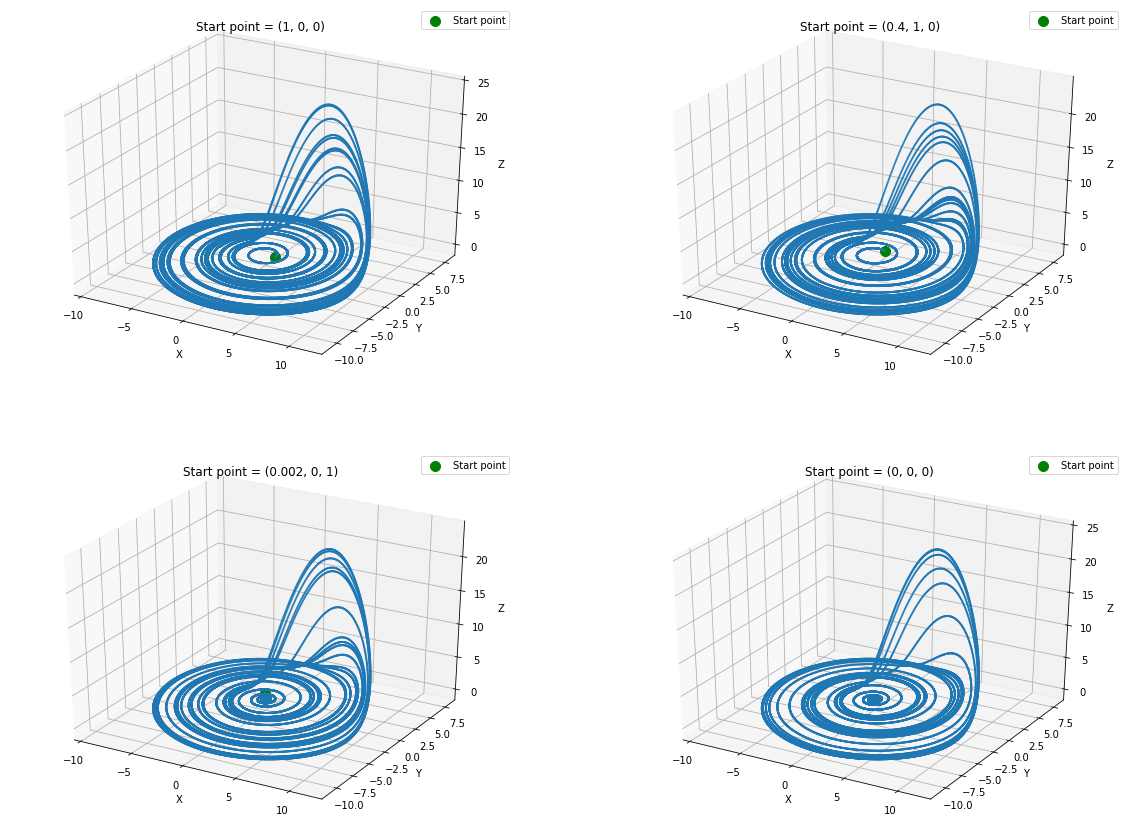

In [10]:
# On plot les trajectoires en 3D
fig = plt.figure(figsize = (20, 15))

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 0, 50000, 0.003)
ax = fig.add_subplot(2,2,1,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (1, 0, 0)')

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 0.4, 1, 0, 50000, 0.003)
ax = fig.add_subplot(2,2,2,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (0.4, 1, 0)')

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 0.002, 0, 1, 50000, 0.003)
ax = fig.add_subplot(2,2,3,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (0.002, 0, 1)')

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 0, 0, 0, 50000, 0.003)
ax = fig.add_subplot(2,2,4,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (0, 0, 0)')

On peut voir et conjecturer que les valeurs ne "s'envolent" pas trop.

***Calcul du plus grand exposant de Lyapunov***

Dans cette parti j'utilise l'objet *matrix* de la bibliothèque Numpy qui possède une très grande palette de méthodes et d'attributs tel que la transposition ou la multiplication matricielle.

Cependant il n'y a pas le produit scalaire donc j'utilise la formule $<a, b> = b^Ta$

In [11]:
def jacobienne(a, b, c, x, y, z):
    '''Retourne la jacobienne du flot de parametre a, b, c et  associee a x, y, z'''
    return np.matrix([[0, -1, -1], [1, a, 0], [z, 0, x-c]])    

In [12]:
def orthogonalisation_gram_schmidt(B):
    ''' Prend en entree une base B et renvoie la base orthogonalisee selon la methode de Gram-Schmidt'''
    BON = []
    for i in range(len(B)):
        y = B[i].copy()
        for j in range(len(BON)):
            y -= float((BON[j].T)*(B[i]))/float((BON[j].T*BON[j])) * BON[j]
        BON.append(y)
    return BON     

In [13]:
def normalisation(B):
    '''Prend en entree une base et renvoie la base normalisee'''
    return [z/float(z.T*z) for z in B]

In [14]:
def exposant_lyapunov(a, b, c, x0, y0, z0, N, t):
    '''Renvoie les exposants de Lyapunov'''
    exposants = []
    T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(a, b, c, x0, y0, z0, N, t)
    B = [[np.matrix([[1], [0], [0]]), np.matrix([[0], [1], [0]]), np.matrix([[0], [0], [1]])]]
    for i in range(len(X)): # Cette boucle applique la Jacobienne a tous les vecteurs de la derniere base (normee), puis l'orthogonalise
        B1 = [jacobienne(a, b, c, X[i], Y[i], Z[i])*u for u in normalisation(B[-1])]
        B1 = orthogonalisation_gram_schmidt(B1)
        B.append(B1)
    for k in range(3): # cette boucle calcule les exposants de lyapunov
        lyap = 0
        for b in B[1:]:
            lyap -= np.log(float(b[k].T*b[k]))/len(B[1:])
        exposants.append(lyap)
    return exposants

In [15]:
# Plus grand exposant de lyapunov
max(exposant_lyapunov(0.2, 0.2, 5.7, 1, 0, 0, 10000, 0.003))

0.08014952751098464

J'ai mal lu la question et j'ai calculé tous les exposants de Lyapunov puis j'ai pris le maximum....
Mais ce n'est pas grave, on trouve environ 0.09 pour le plus grand coeficient de Lyapunov. (donc c'est un système chaotique)

D'après mes recherches sur le plus grand exposant de Lyapunov de l'attracteur de Rossler cette valeur n'est pas aberrante et est même proche de la valeur attendu [Vivien Mallet, *Attracteur de Rossler*](http://vivienmallet.net/chaos/rossler/).

## Question 7 :

Nous allons calculer la dérivée de Lie du flot $\frac{\mathrm{d}\dot{x}}{\mathrm{d} x}+\frac{\mathrm{d}\dot{y}}{\mathrm{d}y}+\frac{\mathrm{d}\dot{z}}{\mathrm{d}z}$ puis en faire la moyenne sur une trajectoire

In [16]:
# On calcule la derivee de Lie sur une trajectoire et on renvoie la moyenne
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(0.2, 0.2, 5.7, 1, 0, 1, 50000, 0.003)
derivX = [(Xpoint[i+1]-Xpoint[i])/(X[i+1]-X[i]) for i in range(len(X)-1)]
derivY = [(Ypoint[i+1]-Ypoint[i])/(Y[i+1]-Y[i]) for i in range(len(Y)-1)]
derivZ = [(Zpoint[i+1]-Zpoint[i])/(Z[i+1]-Z[i]) for i in range(len(Z)-1)]
Lie = [derivX[i]+derivY[i]+derivZ[i] for i in range(len(derivX))]
np.array(Lie).mean()

-2.7169597387968434

Déjà avant d'utiliser la moyenne de la dérivée de Lie, on peut savoir que le flot est dissipatif car vu que j'ai calculé tous les exposants de Lyapunov, en faisant la somme on remarque qu'elle est négative.

In [17]:
LAMBDA = exposant_lyapunov(0.2, 0.2, 5.7, 1, 0, 1, 10000, 0.003)
print('Exposants de Lyapunov : '+str(LAMBDA))
print('Somme des exposants = '+str(sum(LAMBDA)))

Exposants de Lyapunov : [-1.6445465918805566, -0.022680541019696934, 0.0344054128739093]
Somme des exposants = -1.6328217200263442


Je ne sais pas conclure quant au caractère dissipatif de du flot avec la dérivée de Lie, je pense que cela a un rapport avec la propriété disant :

Si le jacobien de l'attracteur :

$$|det(J)| = |\begin{vmatrix}
0 & -1 & -1\\ 
1 & a & 0\\ 
z & 0 & x-c
\end{vmatrix}| = |x+za -c| < 1$$

Alors le flot est dissipatif.